In [1]:
import numpy as np
import tensorflow as tf
import keras
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
import pandas as pd 

train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())

   Unnamed: 0                                              image  black  blue  \
0           0  ./clothes_dataset\blue_shorts\256d854b55ac32ea...    0.0   1.0   
1           1  ./clothes_dataset\red_pants\584f778aece14f07c2...    0.0   0.0   
2           2  ./clothes_dataset\green_pants\ec543ca241cefb2b...    0.0   0.0   
3           3  ./clothes_dataset\brown_shorts\c8db9e0f7010592...    0.0   0.0   
4           4  ./clothes_dataset\white_dress\551373c80717c5b0...    0.0   0.0   

   brown  green  red  white  dress  shirt  pants  shorts  shoes  
0    0.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
1    0.0    0.0  1.0    0.0    0.0    0.0    1.0     0.0    0.0  
2    0.0    1.0  0.0    0.0    0.0    0.0    1.0     0.0    0.0  
3    1.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
4    0.0    0.0  0.0    1.0    1.0    0.0    0.0     0.0    0.0  


In [3]:
# 이미지 제너레이터를 정의합니다.
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [77]:
train_df

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,5573,./clothes_dataset\black_shoes\31e11164a2a206ec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5574,5574,./clothes_dataset\white_shoes\00271191db9b1fd6...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5575,5575,./clothes_dataset\black_pants\afa29481cd27a475...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5576,5576,./clothes_dataset\green_shoes\aaeba68f98a07bf7...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
class_col=list(train_df.columns[2:])
class_col

['black',
 'blue',
 'brown',
 'green',
 'red',
 'white',
 'dress',
 'shirt',
 'pants',
 'shorts',
 'shoes']

In [6]:
batch_size=32

In [7]:
# Make Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=32,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=32,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [114]:
model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size),
         validation_data = val_generator,
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 10,
         callbacks=[tensorboard])

Epoch 1/10
175/175 [==============================] - 21s 118ms/step - loss: 0.1645 - acc: 0.5731 - val_loss: 0.1948 - val_acc: 0.5362
Epoch 2/10
175/175 [==============================] - 14s 77ms/step - loss: 0.1606 - acc: 0.5744 - val_loss: 0.1911 - val_acc: 0.6190
Epoch 3/10
175/175 [==============================] - 13s 76ms/step - loss: 0.1572 - acc: 0.5758 - val_loss: 0.1948 - val_acc: 0.5019
Epoch 4/10
175/175 [==============================] - 13s 77ms/step - loss: 0.1416 - acc: 0.5907 - val_loss: 0.1855 - val_acc: 0.6391
Epoch 5/10
175/175 [==============================] - 14s 79ms/step - loss: 0.1416 - acc: 0.5984 - val_loss: 0.1796 - val_acc: 0.6002
Epoch 6/10
175/175 [==============================] - 13s 77ms/step - loss: 0.1376 - acc: 0.6015 - val_loss: 0.1870 - val_acc: 0.5379
Epoch 7/10
175/175 [==============================] - 13s 76ms/step - loss: 0.1372 - acc: 0.5959 - val_loss: 0.2039 - val_acc: 0.5567
Epoch 8/10
175/175 [==============================] - 13s 75m

In [9]:
import tensorflow as tf 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices() )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5922468245025979069
xla_global_id: -1
]


In [10]:
# 5. 모델 평가하기
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='',
    x_col='image',
    y_col=class_col,
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

loss_and_metrics = model.evaluate(test_generator,
                                  steps=get_steps(len(test_df), batch_size))
print('loss_and_metrics : ' + str(loss_and_metrics)) 

# loss_and_metrics : [0.18328142291474564, 0.9285179]

Found 3416 validated image filenames.
107/107 [==============================] - 43s 404ms/step - loss: 0.1955 - acc: 0.5992
loss_and_metrics : [0.19554002583026886, 0.5992388725280762]


In [11]:
# 6. 모델 저장하기

save_path = os.path.join('model', 'img_generator_model.h5')
model.save(save_path)

In [59]:
preds=model.predict(test_generator)

107/107 [==============================] - 5s 43ms/step


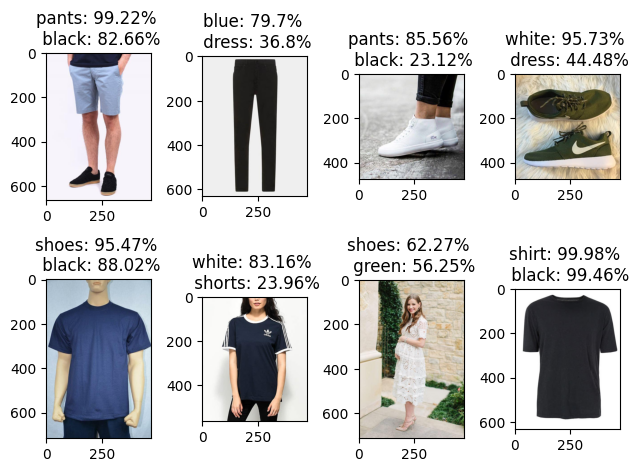

In [60]:
# 8개만 예측해보도록 하겠습니다.
do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred))
    # item --> prob
    # contributor: '뱅커'님
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]

    image = cv2.imread(test_df['image'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')

plt.tight_layout()

1/1 [==============================] - 0s 39ms/step


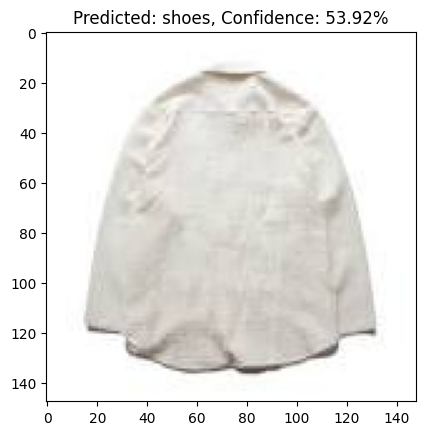

In [108]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model

# 모델 불러오기
model_path = 'model/img_generator_model.h5'
model = load_model(model_path)

# 이미지 불러오기 및 전처리
image_path = 'clothes.jpg'  # 예측하고자 하는 이미지 경로
image = load_img(image_path, target_size=(112, 112))  # 모델에 맞는 크기로 조정
image_array = img_to_array(image)  # 이미지를 배열로 변환
image_array = np.expand_dims(image_array, axis=0)  # 배치 차원 추가
image_array /= 255.0  # 정규화

# 모델로 예측
preds = model.predict(image_array)

# 예측 결과 표시 (가장 높은 확률을 가진 클래스)
predicted_class = np.argmax(preds, axis=1)[0]
confidence = np.max(preds) * 100

# 이미지와 예측 결과 시각화
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted: {class_col[predicted_class]}, Confidence: {confidence:.2f}%')
plt.show()


In [112]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir="logs/{}")

